In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

In [6]:
csv_es = pd.read_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/trends/trends_es_daily.csv")
csv_es

,day,covid,pcr,fiebre,perdida_olfato,antigenos
0,2021-11-28,29,33,30,23,9
1,2021-11-29,43,38,33,34,13
2,2021-11-30,44,34,35,14,14
3,2021-12-01,43,31,41,13,14
4,2021-12-02,49,31,37,0,15
...,...,...,...,...,...,...
62,2022-01-29,27,17,54,0,16
63,2022-01-30,22,12,47,25,13
64,2022-01-31,27,17,46,51,15
65,2022-02-01,26,17,41,20,15


In [7]:
csv_eeuu = pd.read_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/trends/trends_us_daily.csv")
csv_eeuu

,day,covid,pcr,fever,no_smell
0,2021-11-28,28,25,48,51
1,2021-11-29,32,30,45,75
2,2021-11-30,33,30,47,51
3,2021-12-01,31,31,50,51
4,2021-12-02,31,33,50,52
...,...,...,...,...,...
62,2022-01-29,26,23,50,56
63,2022-01-30,23,20,58,45
64,2022-01-31,30,29,58,53
65,2022-02-01,27,26,48,41


In [8]:
casos_es = pd.read_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/covid_aggregated.csv")
casos_es

,fecha,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
0,2020-01-01,0.0,8.0,0.0,0.0
1,2020-01-02,0.0,74.0,1.0,0.0
2,2020-01-03,0.0,8.0,1.0,0.0
3,2020-01-04,0.0,6.0,0.0,0.0
4,2020-01-05,0.0,7.0,0.0,0.0
...,...,...,...,...,...
812,2022-03-23,23132.0,410.0,19.0,49.0
813,2022-03-24,19030.0,385.0,23.0,48.0
814,2022-03-25,17474.0,350.0,15.0,46.0
815,2022-03-26,8415.0,295.0,12.0,39.0


In [9]:
casos_es.dtypes

fecha              object
sum(num_casos)    float64
sum(num_hosp)     float64
sum(num_uci)      float64
sum(num_def)      float64
dtype: object

In [10]:
casos_es.fecha = pd.to_datetime(casos_es.fecha)

In [11]:
casos_es.dtypes

fecha             datetime64[ns]
sum(num_casos)           float64
sum(num_hosp)            float64
sum(num_uci)             float64
sum(num_def)             float64
dtype: object

In [12]:
casos_es = casos_es.set_index(['fecha'])

In [13]:
casos_es['sum(num_casos)'] = casos_es['sum(num_casos)'].apply(lambda l: int (l))

In [14]:
casos_es['sum(num_hosp)'] = casos_es['sum(num_hosp)'].apply(lambda l: int (l))

In [15]:
casos_es['sum(num_uci)'] = casos_es['sum(num_uci)'].apply(lambda l: int (l))

In [16]:
casos_es['sum(num_def)'] = casos_es['sum(num_def)'].apply(lambda l: int (l))

In [17]:
casos_es.dtypes

sum(num_casos)    int64
sum(num_hosp)     int64
sum(num_uci)      int64
sum(num_def)      int64
dtype: object

In [18]:
casos_es_novfeb = casos_es.loc["2021-11-28":"2022-2-2"]
casos_es_novfeb

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
fecha,,,,
2021-11-28,4537,267,36,27
2021-11-29,11555,353,54,41
2021-11-30,13309,425,38,45
2021-12-01,14369,398,60,41
2021-12-02,15618,395,53,36
...,...,...,...,...
2022-01-29,47035,1019,58,246
2022-01-30,39935,943,68,232
2022-01-31,80735,1126,80,266


In [19]:
casos_es = casos_es.resample('1W').sum()
casos_es

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
fecha,,,,
2020-01-05,0,103,2,0
2020-01-12,2,43,2,0
2020-01-19,1,47,3,0
2020-01-26,1,56,2,0
2020-02-02,1,86,1,0
...,...,...,...,...
2022-02-27,117910,2610,156,657
2022-03-06,111225,2296,120,520
2022-03-13,110548,2266,149,436


In [20]:
casos_es.to_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/casos_es_semanal.csv")

In [21]:
trends_es_daily = csv_es

In [22]:
trends_es_daily.day = pd.to_datetime(trends_es_daily.day)
trends_es_daily = trends_es_daily.set_index(['day'])


In [23]:
trends_es_daily

,covid,pcr,fiebre,perdida_olfato,antigenos
day,,,,,
2021-11-28,29,33,30,23,9
2021-11-29,43,38,33,34,13
2021-11-30,44,34,35,14,14
2021-12-01,43,31,41,13,14
2021-12-02,49,31,37,0,15
...,...,...,...,...,...
2022-01-29,27,17,54,0,16
2022-01-30,22,12,47,25,13
2022-01-31,27,17,46,51,15


<AxesSubplot: xlabel='day'>

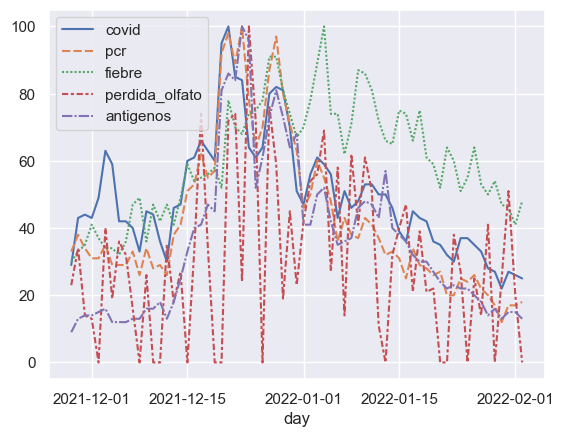

In [93]:
sns.lineplot(data=trends_es_daily)

In [24]:
casos_es_novfeb.index.names = ["day"]
casos_es_novfeb

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
day,,,,
2021-11-28,4537,267,36,27
2021-11-29,11555,353,54,41
2021-11-30,13309,425,38,45
2021-12-01,14369,398,60,41
2021-12-02,15618,395,53,36
...,...,...,...,...
2022-01-29,47035,1019,58,246
2022-01-30,39935,943,68,232
2022-01-31,80735,1126,80,266


In [25]:
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.covid)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.pcr)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.fiebre)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.perdida_olfato)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.antigenos)

0.4380065507706367

In [26]:
head = ['co_covid', 'co_fibre','pcr','perdida_olfato','antigenos']

In [27]:
covid = []
fiebre = []
pcr = []
olfato = []
antigenos = []
corr = {
     'covid':[],
     'pcr':[],
     'fiebre':[],
     'perdida_olfato':[] ,
     'antigenos':[]
}

In [28]:
# avanza la columna i posiciones con respecto al indice
def shift_column(df, col_n, i):
    df_col = df[col_n]
    shifted_index = df_col.index[:-i] if i!=0 else df_col.index
    shifted_col = df_col[i:]
    shifted_col.index = shifted_index
    return shifted_col
        

In [212]:
shift_column(trends_es_daily, 'covid', 5)

day
2021-11-28    63
2021-11-29    59
2021-11-30    42
2021-12-01    42
2021-12-02    40
              ..
2022-01-24    27
2022-01-25    22
2022-01-26    27
2022-01-27    26
2022-01-28    25
Name: covid, Length: 62, dtype: int64

In [29]:
df_t = trends_es_daily.copy()

In [30]:
for i in range(0,50):
    for col_name in trends_es_daily.columns:
        trend_col = trends_es_daily[col_name][:-i] if i!=0 else trends_es_daily[col_name]
        corr[col_name].append(shift_column(casos_es_novfeb, 'sum(num_casos)', i).corr(trend_col))

In [230]:
def correlate_column_df(df:pd.DataFrame ,reference_col: str, corr_df:pd.DataFrame, offset_start:int, offset_end:int)->dict:
    # offset is applied on reference column
    corrd: dict = {}
    for col_name in corr_df.columns:
        corrd[col_name] = []
    for col_name in corr_df.columns:
        for i in range(offset_start, offset_end):
            if(i<0):
                base_col = df[reference_col][:i]
                corrd[col_name].append(shift_column(corr_df,col_name, -i).corr(base_col))
            else:
                trend_col = corr_df[col_name][:-i] if i!=0 else corr_df[col_name] #reference_col is shrinked i-times
                corrd[col_name].append(shift_column(df, reference_col, i).corr(trend_col))
    return corrd 
    

<AxesSubplot: >

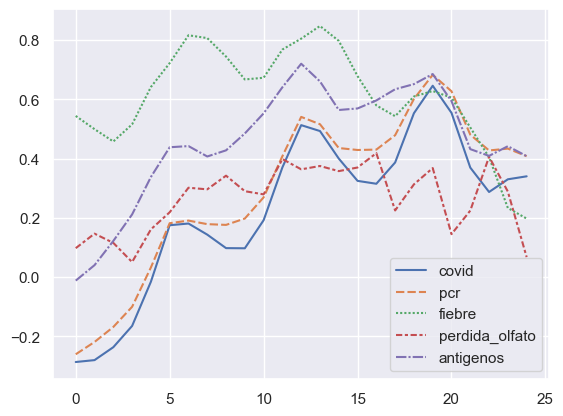

In [231]:
df_probar = pd.DataFrame(dict_test)
sns.lineplot(data=df_probar)

In [408]:
casos_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_casos)', trends_es_daily, -10, 25))
casos_cor.index = np.arange(-10,25,1)
hosp_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_hosp)', trends_es_daily, -10, 25))
hosp_cor.index = np.arange(-10,25,1)
uci_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_uci)', trends_es_daily, -10, 25))
uci_cor.index = np.arange(-10,25,1)
muertes_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_def)', trends_es_daily, -10, 25))
muertes_cor.index = np.arange(-10,25,1)

casos_cor.to_csv('correlation_es_casos.csv')
hosp_cor.to_csv('correlation_es_hosp.csv')
uci_cor.to_csv('correlation_es_uci.csv')
muertes_cor.to_csv('correlation_es_muertes.csv')

<AxesSubplot: >

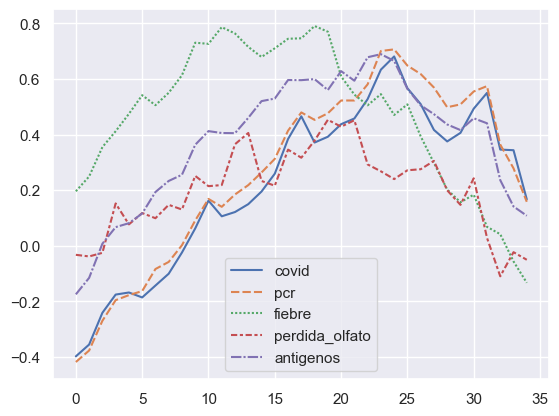

In [407]:
sns.lineplot(uci_cor)

In [33]:
trends_es_daily.columns

Index(['covid', 'pcr', 'fiebre', 'perdida_olfato', 'antigenos'], dtype='object')

In [34]:
for i in trends_es_daily.columns:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [35]:
corr_df = pd.DataFrame(corr)

In [36]:
corr_df.index.names = ['desfase']

In [37]:
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
#%matplotlib inline

[Text(0.5, 1.0, 'Correlación con casos_covid')]

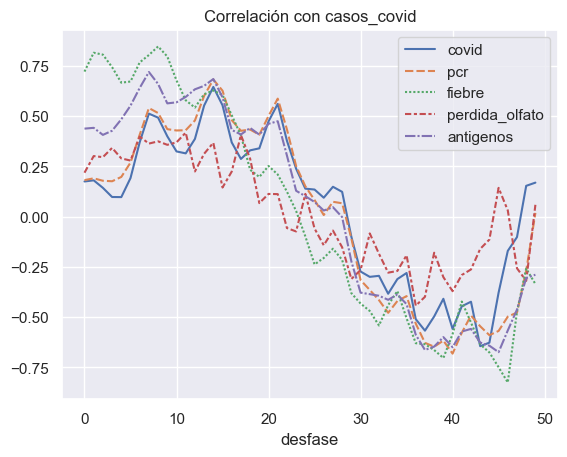

In [127]:
# Plot the responses for different events and regions
sns.lineplot(data=corr_df,).set(title='Correlación con casos_covid')


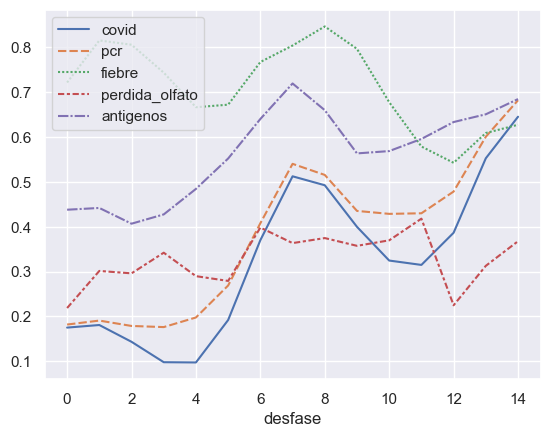

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs


In [39]:
sns.lineplot(data=corr_df.iloc[:15,])
plt.show()
%time

In [40]:
%matplotlib

Using matplotlib backend: QtAgg


In [41]:
plt.show()

In [42]:
corr_df

,covid,pcr,fiebre,perdida_olfato,antigenos
desfase,,,,,
0,0.174986,0.181799,0.721858,0.218667,0.438007
1,0.180738,0.190629,0.815687,0.301417,0.441944
2,0.143272,0.178640,0.806178,0.296025,0.406834
3,0.097757,0.176104,0.743860,0.342107,0.427545
4,0.097208,0.197572,0.666698,0.289757,0.484479
5,0.191904,0.268937,0.672394,0.279121,0.552300
6,0.370126,0.407878,0.767608,0.398194,0.640496
7,0.512571,0.540367,0.804384,0.363527,0.719695
8,0.492612,0.515629,0.846948,0.374742,0.660077


In [43]:
casos_es_novfeb

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
day,,,,
2021-11-28,4537,267,36,27
2021-11-29,11555,353,54,41
2021-11-30,13309,425,38,45
2021-12-01,14369,398,60,41
2021-12-02,15618,395,53,36
...,...,...,...,...
2022-01-29,47035,1019,58,246
2022-01-30,39935,943,68,232
2022-01-31,80735,1126,80,266


In [44]:
trends_es_daily

,covid,pcr,fiebre,perdida_olfato,antigenos
day,,,,,
2021-11-28,29,33,30,23,9
2021-11-29,43,38,33,34,13
2021-11-30,44,34,35,14,14
2021-12-01,43,31,41,13,14
2021-12-02,49,31,37,0,15
...,...,...,...,...,...
2022-01-29,27,17,54,0,16
2022-01-30,22,12,47,25,13
2022-01-31,27,17,46,51,15


In [45]:
merged =trends_es_daily.join(casos_es_novfeb)

In [46]:
merged.to_csv('datosparadonalberto.csv')

# Exponential smoothing for the time series

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [85]:
rollingseries = casos_es_novfeb.rolling(window=1)
rollingmean = rollingseries.mean()
rollingmean.head(100)

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
day,,,,
2021-11-28,4537.0,267.0,36.0,27.0
2021-11-29,11555.0,353.0,54.0,41.0
2021-11-30,13309.0,425.0,38.0,45.0
2021-12-01,14369.0,398.0,60.0,41.0
2021-12-02,15618.0,395.0,53.0,36.0
...,...,...,...,...
2022-01-29,47035.0,1019.0,58.0,246.0
2022-01-30,39935.0,943.0,68.0,232.0
2022-01-31,80735.0,1126.0,80.0,266.0


<AxesSubplot: xlabel='day', ylabel='sum(num_casos)'>

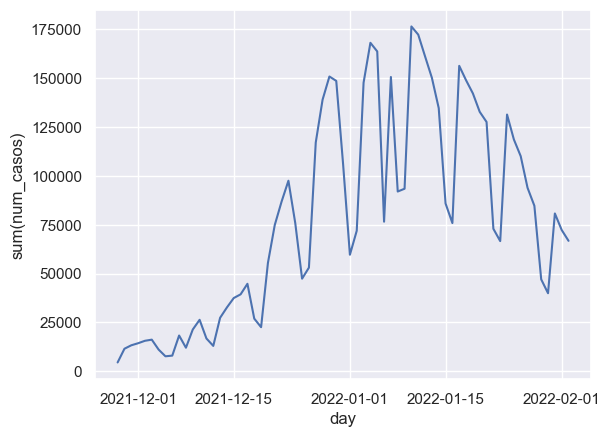

In [86]:
sns.lineplot(data=rollingmean.loc[:,'sum(num_casos)'])

In [87]:
%matplotlib inline

In [439]:
covidcasos_smooth = SimpleExpSmoothing(casos_es_novfeb.loc[:,'sum(num_casos)']).fit(smoothing_level=0.2, optimized=False)

/home/guti/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


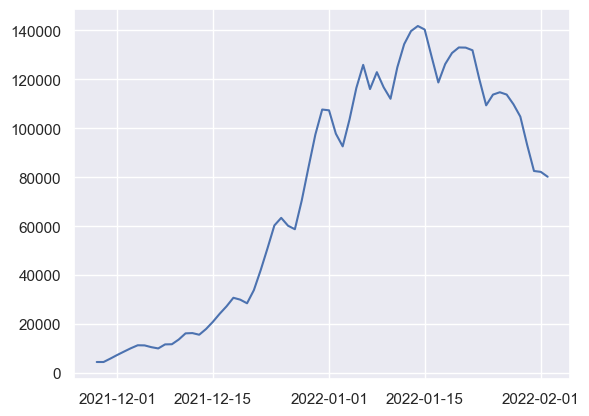

In [440]:
plt.plot(covidcasos_smooth.fittedvalues)

In [441]:
# holt method
fit1 = Holt(casos_es_novfeb.loc[:,'sum(num_casos)'], exponential=True).fit()

/home/guti/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/guti/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [442]:
covidcasos_smoothed = covidcasos_smooth.fittedvalues

In [443]:
aaa = pd.DataFrame(covidcasos_smoothed).rename(columns={0:'sum(num_casos)'})

In [450]:
aaa.to_csv('covid_es_exponentialsmooth02.csv')

In [444]:
casosfit_cor = pd.DataFrame(correlate_column_df(aaa, 'sum(num_casos)', trends_es_daily, -10, 40))
casosfit_cor.index = np.arange(-10,40,1)
casosfit_cor

,covid,pcr,fiebre,perdida_olfato,antigenos
-10,-0.642527,-0.670034,-0.023697,-0.150070,-0.457995
-9,-0.616188,-0.643788,0.016742,-0.126815,-0.407323
-8,-0.589988,-0.611569,0.069092,-0.139752,-0.354323
-7,-0.546601,-0.564355,0.142194,-0.145671,-0.292444
-6,-0.508118,-0.503457,0.221474,-0.098266,-0.226719
-5,-0.475917,-0.453286,0.311377,-0.064772,-0.163205
-4,-0.440505,-0.405442,0.393877,-0.001516,-0.109915
-3,-0.403693,-0.359317,0.446176,0.046983,-0.056117
-2,-0.366877,-0.315342,0.482964,0.077792,0.003793
-1,-0.320501,-0.269523,0.524853,0.070302,0.071263


<AxesSubplot: >

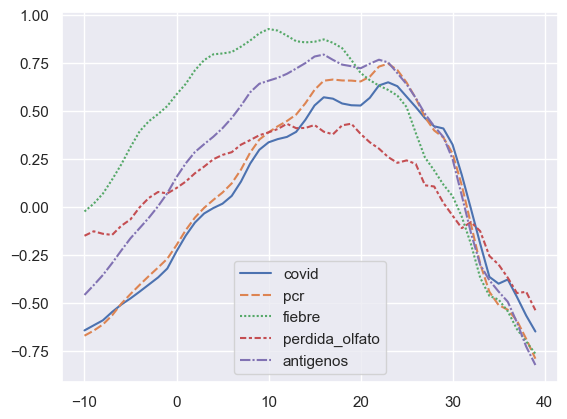

In [445]:
sns.lineplot(casosfit_cor)

In [446]:
casosfit_cor['mean']=casosfit_cor.mean(axis=1)

In [447]:
casosfit_cor.shape

(50, 6)

In [448]:
casosfit_cor

,covid,pcr,fiebre,perdida_olfato,antigenos,mean
-10,-0.642527,-0.670034,-0.023697,-0.150070,-0.457995,-0.388865
-9,-0.616188,-0.643788,0.016742,-0.126815,-0.407323,-0.355474
-8,-0.589988,-0.611569,0.069092,-0.139752,-0.354323,-0.325308
-7,-0.546601,-0.564355,0.142194,-0.145671,-0.292444,-0.281375
-6,-0.508118,-0.503457,0.221474,-0.098266,-0.226719,-0.223017
-5,-0.475917,-0.453286,0.311377,-0.064772,-0.163205,-0.169161
-4,-0.440505,-0.405442,0.393877,-0.001516,-0.109915,-0.112700
-3,-0.403693,-0.359317,0.446176,0.046983,-0.056117,-0.065194
-2,-0.366877,-0.315342,0.482964,0.077792,0.003793,-0.023534
-1,-0.320501,-0.269523,0.524853,0.070302,0.071263,0.015279


<AxesSubplot: >

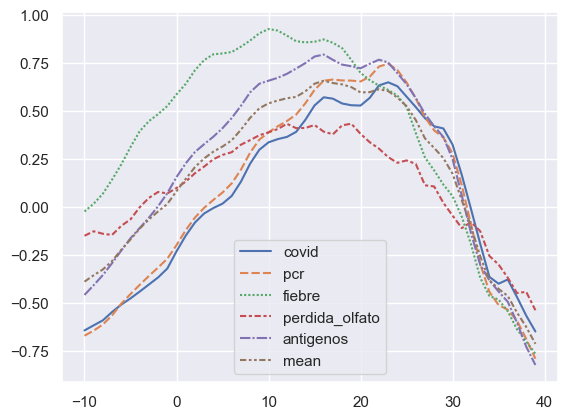

In [451]:
sns.lineplot(casosfit_cor[:])

In [452]:
casosfit_cor.to_csv('correlation_es_smooth.csv')

In [ ]:
# calc definitivo
casos_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_casos)', trends_es_daily, -10, 25))
casos_cor.index = np.arange(-10,25,1)
hosp_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_hosp)', trends_es_daily, -10, 25))
hosp_cor.index = np.arange(-10,25,1)
uci_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_uci)', trends_es_daily, -10, 25))
uci_cor.index = np.arange(-10,25,1)
muertes_cor = pd.DataFrame(correlate_column_df(casos_es_novfeb, 'sum(num_def)', trends_es_daily, -10, 25))
muertes_cor.index = np.arange(-10,25,1)

casos_cor.to_csv('correlation_es_casos.csv')
hosp_cor.to_csv('correlation_es_hosp.csv')
uci_cor.to_csv('correlation_es_uci.csv')
muertes_cor.to_csv('correlation_es_muertes.csv')

# Usa correlation

In [336]:
usa_cases = pd.read_csv('usa_clean.csv')

In [337]:
usa_cases.shape
usa_cases.columns

Index(['Unnamed: 0', 'date', 'sum(tot_cases)', 'num_cases'], dtype='object')

In [339]:
usa_cases = usa_cases.drop(['Unnamed: 0'], axis=1)
usa_cases['date'] = pd.to_datetime(usa_cases['date'])

In [340]:
usa_cases['date'] = pd.to_datetime(usa_cases['date'])
usa_cases = usa_cases.set_index(['date'])

In [341]:
usa_cases

,sum(tot_cases),num_cases
date,,
2020-01-22,4,4
2020-01-23,6,2
2020-01-24,7,1
2020-01-25,7,0
2020-01-26,8,1
...,...,...
2022-10-14,96754827,36502
2022-10-15,96763244,8417
2022-10-16,96777835,14591


In [350]:
csv_eeuu['day'] = pd.to_datetime(csv_eeuu['day'])
print(csv_eeuu.dtypes)
trends_us_daily = csv_eeuu.set_index(['day']) 
trends_us_daily.dtypes

day         datetime64[ns]
covid                int64
pcr                  int64
fever                int64
no_smell             int64
dtype: object


covid       int64
pcr         int64
fever       int64
no_smell    int64
dtype: object

In [354]:
casos_us_novfeb = usa_cases.loc['2021-11-2':'2022-2-2',:]

<AxesSubplot: xlabel='date', ylabel='num_cases'>

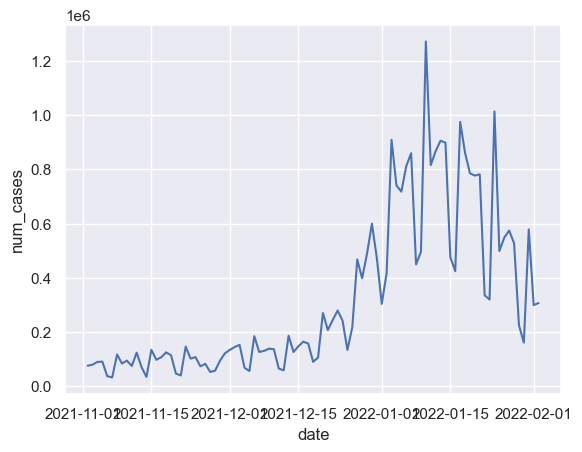

In [358]:
sns.lineplot(x=casos_us_novfeb.index, y=casos_us_novfeb['num_cases'])

In [390]:
usa_correlation = correlate_column_df(casos_us_novfeb, 'num_cases', trends_us_daily, -7, 25)

In [391]:
usa_correlation_df = pd.DataFrame(usa_correlation)

In [392]:
usa_correlation_df.index = np.arange(-7,25,1)

<AxesSubplot: >

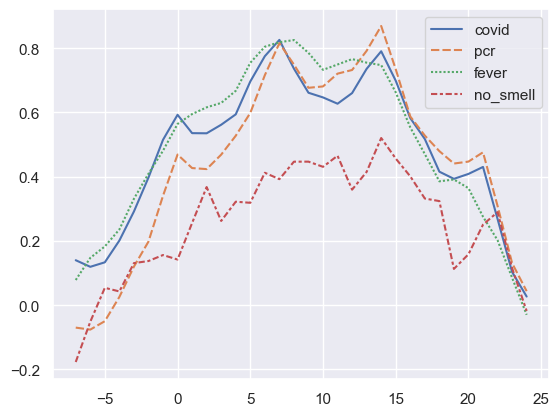

In [393]:
sns.lineplot(usa_correlation_df)

In [394]:
usa_correlation_df.to_csv('correlation_usa.csv')

In [363]:
smooth_usa = SimpleExpSmoothing(casos_es_novfeb.loc[:,'sum(num_casos)']).fit(smoothing_level=0.3, optimized=False)

/home/guti/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [364]:
smooth_usa_data = smooth_usa.fittedvalues

In [367]:
smooth_usa_df = pd.DataFrame(covidcasos_smoothed).rename(columns={0:'sum(num_casos)'})

In [453]:
smooth_usa_df.to_csv('covid_usa_smooth03.csv')

In [386]:
usa_correlation_smoothed = correlate_column_df(smooth_usa_df, 'sum(num_casos)', trends_us_daily, -7, 25)
usa_correlation_smoothed_df = pd.DataFrame(usa_correlation_smoothed)
usa_correlation_smoothed_df.index = np.arange(-7,25,1)

<AxesSubplot: >

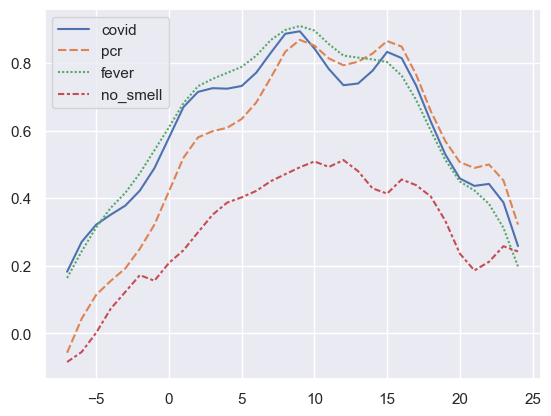

In [389]:
sns.lineplot(usa_correlation_smoothed_df)

In [385]:
usa_correlation_smoothed_df

,covid,pcr,fever,no_smell
-7,0.182120,-0.057800,0.163710,-0.085223
-6,0.270377,0.042931,0.242241,-0.055609
-5,0.321497,0.113840,0.313509,0.001496
-4,0.351015,0.155007,0.371326,0.072685
-3,0.377757,0.191787,0.415463,0.122204
-2,0.422189,0.250180,0.473621,0.172085
-1,0.488483,0.321246,0.541612,0.155295
0,0.578694,0.420009,0.609397,0.207932
1,0.669701,0.519506,0.681348,0.245622
2,0.714583,0.579852,0.731316,0.298693


In [388]:
usa_correlation_smoothed_df.to_csv('correlation_usa_smooth.csv')